Hi there! Welcome to Xiaomeng Li, Wing Hong Ho, and Qi Wang's CIS 545 final project from Spring 2023.

Throughout this notebook we'll be trying to predict the flight price based on different features from flights dataset (which can be found in our drive). We'll walk you through the entire process by downloading and acquiring preliminary datasets, extracting features, conducting EDA, training and modelling. We believe the dataset we picked is the best we could find in the public domain. Other datasets out there are either too large (>30GB) or lack of information (without date, price, etc).

Let's begin!

# Before Running... 

## Save data in own private google drive

We have created a new google drive for this final project. For conviencne, we already downloaded the datasets from Kaggle and saved in the drive.

</br>Reference: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
<br> We utilized the below drive for much our analysis. You can access the files using the below link:

*  Click on this google drive [link for drive](https://drive.google.com/drive/folders/1GTFzFK3BG2k3x1tJkoIO7zPvN0wVDAig?usp=share_link).
*  After finishing your session, you may delete the drive folder from your private google drive in the shared with me folder.  

# Flight Data Downloading

In [ ]:
# download data loaded from Kaggle from a shared google drive link
!gdown 17ccCTcOlKJ7jiSk0UarcbF9xRMtiUSc9

Downloading...
From: https://drive.google.com/uc?id=17ccCTcOlKJ7jiSk0UarcbF9xRMtiUSc9
To: /content/flight-price-prediction.zip
100% 4.36M/4.36M [00:00<00:00, 201MB/s]


# Import the Required Libraries
This section involves importing the necessary libraries and modules that will be used throughout the project. This typically includes libraries for data manipulation, visualization, statistical analysis, and machine learning algorithms. By importing these libraries at the beginning of the project, we can ensure that all the required dependencies are available and properly installed. It also helps in maintaining the code structure and makes it easier to share the code with others.

In [ ]:
# import relevant libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Flights Data Extraction & Cleaning

### Flights Data Extraction

*  Unzip the file
*  Read csv file as pandas dataframe

In [ ]:
# unzip the downloaded file
! unzip flight-price-prediction

Archive:  flight-price-prediction.zip
  inflating: Clean_Dataset.csv       
  inflating: business.csv            
  inflating: economy.csv             


In [ ]:
# read the 3 csv files
flights_df = pd.read_csv("Clean_Dataset.csv")
business_df = pd.read_csv("business.csv")
economoy_df = pd.read_csv("economy.csv")

In [ ]:
# show first 5 rows
flights_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
flights_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
# show first 5 rows
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [ ]:
business_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [ ]:
# show first 5 rows
economoy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [ ]:
economoy_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


### Flights Data Cleaning

*  Drop irrelvant column: 'Unnamed: 0'
*  Drop duplicates: if two rows are exactly the same including the price, it means two rows are referring to the same ticket
*  Drop NA

#### (a) Remove Nulls and Drop Duplicates

In [ ]:
# drop useless columns
flights_df = flights_df.drop(['Unnamed: 0', 'departure_time', 'arrival_time'], axis=1)

# drop duplicates
flights_cleaned_df = flights_df.drop_duplicates().reset_index(drop = True)

# drop NA
flights_cleaned_df = flights_cleaned_df.dropna()

# show first 5 rows
flights_cleaned_df.head()

,airline,flight,source_city,stops,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,zero,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,zero,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,zero,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,zero,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,zero,Mumbai,Economy,2.33,1,5955


#### (b) Remove special characters

Some of the columns have special characters, so we need to clean all these columns by replacing all the `_` with ` ` (space).

In [ ]:
# remove special characters
flights_cleaned_df['airline'] = flights_cleaned_df['airline'].str.replace('_', ' ', regex = True)
flights_cleaned_df['flight'] = flights_cleaned_df['flight'].str.split('-').str.get(1)

#### (c) Rename Columns
*  reanme source_city to departure_city
*  reanme flight to flight_number
*  reanme class to ticket_class

In [ ]:
# renames columns 
flights_cleaned_df = flights_cleaned_df.rename(columns = {'source_city': 'departure_city'})
flights_cleaned_df = flights_cleaned_df.rename(columns = {'flight': 'fligh_number'})
flights_cleaned_df = flights_cleaned_df.rename(columns = {'class': 'ticket_class'})
flights_cleaned_df

,airline,fligh_number,departure_city,stops,destination_city,ticket_class,duration,days_left,price
0,SpiceJet,8709,Delhi,zero,Mumbai,Economy,2.17,1,5953
1,SpiceJet,8157,Delhi,zero,Mumbai,Economy,2.33,1,5953
2,AirAsia,764,Delhi,zero,Mumbai,Economy,2.17,1,5956
3,Vistara,995,Delhi,zero,Mumbai,Economy,2.25,1,5955
4,Vistara,963,Delhi,zero,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,822,Chennai,one,Hyderabad,Business,10.08,49,69265
300149,Vistara,826,Chennai,one,Hyderabad,Business,10.42,49,77105
300150,Vistara,832,Chennai,one,Hyderabad,Business,13.83,49,79099
300151,Vistara,828,Chennai,one,Hyderabad,Business,10.00,49,81585


### Business Data Cleaning

*  Drop irrelvant columns: 'ch_code'
*  Drop duplicates: if two rows are exactly the same including the price, it means two rows are referring to the same ticket
*  Drop NA

#### (a) Remove Nulls and Drop Duplicates

In [ ]:
# drop useless columns
business_df = business_df.drop(['ch_code'], axis=1)

# drop duplicates
business_cleaned_df = business_df.drop_duplicates().reset_index(drop = True)

# drop NA
business_cleaned_df = business_df.dropna()

# show first 5 rows
business_cleaned_df.head()

,date,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


#### (b) Remove special characters

Some entries have special characters such as new line `\n`, `\t`, and `,`, so we need to clean all these columns using split and replace.

In [ ]:
# remove special characters
business_cleaned_df['stop'] = business_cleaned_df['stop'].str.split('\n').str.get(0)
business_cleaned_df['price'] = business_cleaned_df['price'].str.replace(',', '', regex = True)

#### (c) Rename Columns
*  reanme num_code to flight_number
*  reanme dep_time to departure_time
*  reanme arr_time to arrival_time

In [ ]:
# renames columns 
business_cleaned_df = business_cleaned_df.rename(columns = {'num_code': 'fligh_number'})
business_cleaned_df = business_cleaned_df.rename(columns = {'dep_time': 'departure_time'})
business_cleaned_df = business_cleaned_df.rename(columns = {'arr_time': 'arrival_time'})
business_cleaned_df

,date,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price
0,11-02-2022,Air India,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612
1,11-02-2022,Air India,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612
2,11-02-2022,Air India,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220
3,11-02-2022,Air India,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450
4,11-02-2022,Air India,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690
...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,822,09:45,Chennai,10h 05m,1-stop,19:50,Hyderabad,69265
93483,31-03-2022,Vistara,826,12:30,Chennai,10h 25m,1-stop,22:55,Hyderabad,77105
93484,31-03-2022,Vistara,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,79099
93485,31-03-2022,Vistara,828,07:00,Chennai,10h 00m,1-stop,17:00,Hyderabad,81585


### Economoy Data Cleaning

*  Drop irrelvant columns: 'ch_code'
*  Drop duplicates: if two rows are exactly the same including the price, it means two rows are referring to the same ticket
*  Drop NA

#### (a) Remove Nulls and Drop Duplicates

In [ ]:
# drop useless columns
economoy_df = economoy_df.drop(['ch_code'], axis=1)

# drop duplicates
economoy_cleaned_df = economoy_df.drop_duplicates().reset_index(drop = True)

# drop NA
economoy_cleaned_df = economoy_cleaned_df.dropna()

# show first 5 rows
economoy_cleaned_df.head()

,date,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


#### (b) Remove special characters

Some entries have special characters such as new line `\n`, `\t`, and `,`, so we need to clean all these columns using split and replace.

In [ ]:
# remove special characters
economoy_cleaned_df['stop'] = economoy_cleaned_df['stop'].str.split('\n').str.get(0)
economoy_cleaned_df['price'] = economoy_cleaned_df['price'].str.replace(',', '', regex = True)

#### (c) Rename Columns
*  reanme num_code to flight_number
*  reanme dep_time to departure_time
*  reanme arr_time to arrival_time

In [ ]:
# renames columns 
economoy_cleaned_df = economoy_cleaned_df.rename(columns = {'num_code': 'fligh_number'})
economoy_cleaned_df = economoy_cleaned_df.rename(columns = {'dep_time': 'departure_time'})
economoy_cleaned_df = economoy_cleaned_df.rename(columns = {'arr_time': 'arrival_time'})
economoy_cleaned_df

,date,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price
0,11-02-2022,SpiceJet,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953
1,11-02-2022,SpiceJet,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953
2,11-02-2022,AirAsia,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956
3,11-02-2022,Vistara,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955
4,11-02-2022,Vistara,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955
...,...,...,...,...,...,...,...,...,...,...
206767,31-03-2022,Vistara,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,7697
206768,31-03-2022,Vistara,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,7709
206769,31-03-2022,Vistara,826,12:30,Chennai,20h 35m,1-stop,09:05,Hyderabad,8640
206770,31-03-2022,Vistara,822,09:45,Chennai,23h 20m,1-stop,09:05,Hyderabad,8640


### Merge Dataframe
Merge business class ticket dataframe and economy class ticket dataframe into a single dataframe

In [ ]:
# Combine all dataframes togehter
economoy_cleaned_df['is_economy'] = 1
business_cleaned_df['is_economy'] = 0
flight_ticket_cleaned_df = pd.concat([business_cleaned_df, economoy_cleaned_df])
flight_ticket_cleaned_df

,date,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price,is_economy
0,11-02-2022,Air India,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,0
1,11-02-2022,Air India,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,0
2,11-02-2022,Air India,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,0
3,11-02-2022,Air India,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,0
4,11-02-2022,Air India,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,0
...,...,...,...,...,...,...,...,...,...,...,...
206767,31-03-2022,Vistara,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,7697,1
206768,31-03-2022,Vistara,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,7709,1
206769,31-03-2022,Vistara,826,12:30,Chennai,20h 35m,1-stop,09:05,Hyderabad,8640,1
206770,31-03-2022,Vistara,822,09:45,Chennai,23h 20m,1-stop,09:05,Hyderabad,8640,1


In [ ]:
# replace the values of column stop to numeric values
flight_ticket_cleaned_df['stop'] = flight_ticket_cleaned_df['stop'].replace('non', 0, regex=True)
flight_ticket_cleaned_df['stop'] = flight_ticket_cleaned_df['stop'].replace('1', 1, regex=True)
flight_ticket_cleaned_df['stop'] = flight_ticket_cleaned_df['stop'].replace('2', 2, regex=True)
flight_ticket_cleaned_df['stop'] = flight_ticket_cleaned_df['stop'].replace('3', 3, regex=True)
flight_ticket_cleaned_df['stop'] = flight_ticket_cleaned_df['stop'].replace('4', 4, regex=True)
flight_ticket_cleaned_df = flight_ticket_cleaned_df.drop(flight_ticket_cleaned_df[(flight_ticket_cleaned_df['stop'] < 0) | (flight_ticket_cleaned_df['stop'] > 4)].index, axis=0)

flight_ticket_cleaned_df

,date,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price,is_economy
0,11-02-2022,Air India,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,25612,0
1,11-02-2022,Air India,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,25612,0
2,11-02-2022,Air India,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,42220,0
3,11-02-2022,Air India,839,21:25,Delhi,26h 30m,1,23:55,Mumbai,44450,0
4,11-02-2022,Air India,544,17:15,Delhi,06h 40m,1,23:55,Mumbai,46690,0
...,...,...,...,...,...,...,...,...,...,...,...
206767,31-03-2022,Vistara,832,07:05,Chennai,13h 50m,1,20:55,Hyderabad,7697,1
206768,31-03-2022,Vistara,832,07:05,Chennai,13h 50m,1,20:55,Hyderabad,7709,1
206769,31-03-2022,Vistara,826,12:30,Chennai,20h 35m,1,09:05,Hyderabad,8640,1
206770,31-03-2022,Vistara,822,09:45,Chennai,23h 20m,1,09:05,Hyderabad,8640,1


# Feature Engineering

### Feature Engineering Conclusion

Exisiting features are not enough for analysis, so below features would be needed:
*  Day of the Week
*  'Month' and 'Day'
*  Time of the Day

Please note that they datasets only inlcude one year, so we don't need to extract the feature for 'Year'.

We also need latitude & longitude for both from and to cities:
*  Latitude & Longitude for Departure Cities
*  Latitude & Longitude for Arrival Cities

### Import Relevant Package

In [ ]:
!pip install geopy
from geopy.geocoders import Nominatim
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Type Conversion

In [ ]:
# copy flight_ticket_cleaned_df as flights_complete_feature_df
flights_complete_feature_df = flight_ticket_cleaned_df.copy(deep=True)

flights_complete_feature_df['price'] = flights_complete_feature_df['price'].astype(float)

# convert duration of flight time to minutes
def time_to_minutes(time_str):
    if len(time_str) == 7 and time_str[-1] == 'm' and time_str[2] == 'h':
        return int(time_str[0:2]) * 60 + int(time_str[4:6])
    else:
        return None

flights_complete_feature_df['time_taken'] = flights_complete_feature_df['time_taken'].apply(time_to_minutes)
flights_complete_feature_df.dropna(subset=['time_taken'], inplace=True)

flights_complete_feature_df

,date,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price,is_economy
0,11-02-2022,Air India,868,18:00,Delhi,120.0,0,20:00,Mumbai,25612.0,0
1,11-02-2022,Air India,624,19:00,Delhi,135.0,0,21:15,Mumbai,25612.0,0
2,11-02-2022,Air India,531,20:00,Delhi,1485.0,1,20:45,Mumbai,42220.0,0
3,11-02-2022,Air India,839,21:25,Delhi,1590.0,1,23:55,Mumbai,44450.0,0
4,11-02-2022,Air India,544,17:15,Delhi,400.0,1,23:55,Mumbai,46690.0,0
...,...,...,...,...,...,...,...,...,...,...,...
206767,31-03-2022,Vistara,832,07:05,Chennai,830.0,1,20:55,Hyderabad,7697.0,1
206768,31-03-2022,Vistara,832,07:05,Chennai,830.0,1,20:55,Hyderabad,7709.0,1
206769,31-03-2022,Vistara,826,12:30,Chennai,1235.0,1,09:05,Hyderabad,8640.0,1
206770,31-03-2022,Vistara,822,09:45,Chennai,1400.0,1,09:05,Hyderabad,8640.0,1


### Feature: Day of the Week

In [ ]:
# create a dictionary for day maping
days_of_week = {'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
get_day_of_week = lambda date_str: datetime.strptime(date_str, '%d-%m-%Y').strftime('%A')

# extract day of week from departure date 
flights_complete_feature_df['day_of_week'] = flights_complete_feature_df['date'].apply(get_day_of_week)
flights_complete_feature_df['day_of_week'] = flights_complete_feature_df['day_of_week'].map(days_of_week)

flights_complete_feature_df

,date,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price,is_economy,day_of_week
0,11-02-2022,Air India,868,18:00,Delhi,120.0,0,20:00,Mumbai,25612.0,0,5
1,11-02-2022,Air India,624,19:00,Delhi,135.0,0,21:15,Mumbai,25612.0,0,5
2,11-02-2022,Air India,531,20:00,Delhi,1485.0,1,20:45,Mumbai,42220.0,0,5
3,11-02-2022,Air India,839,21:25,Delhi,1590.0,1,23:55,Mumbai,44450.0,0,5
4,11-02-2022,Air India,544,17:15,Delhi,400.0,1,23:55,Mumbai,46690.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
206767,31-03-2022,Vistara,832,07:05,Chennai,830.0,1,20:55,Hyderabad,7697.0,1,4
206768,31-03-2022,Vistara,832,07:05,Chennai,830.0,1,20:55,Hyderabad,7709.0,1,4
206769,31-03-2022,Vistara,826,12:30,Chennai,1235.0,1,09:05,Hyderabad,8640.0,1,4
206770,31-03-2022,Vistara,822,09:45,Chennai,1400.0,1,09:05,Hyderabad,8640.0,1,4


### Feature: 'Month' and 'Day' for Departure and Arrival



In [ ]:
# extract month of flight from departure date 
flights_complete_feature_df['date'] = pd.to_datetime(flights_complete_feature_df['date'], format='%d-%m-%Y')
flights_complete_feature_df['month'] = flights_complete_feature_df['date'].dt.month

flights_complete_feature_df = flights_complete_feature_df.sort_values(by=['month'], ascending=[True])
flights_complete_feature_df = flights_complete_feature_df.drop('date', axis = 1)

flights_complete_feature_df

,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price,is_economy,day_of_week,month
0,Air India,868,18:00,Delhi,120.0,0,20:00,Mumbai,25612.0,0,5,2
79190,Vistara,880,13:25,Hyderabad,1230.0,1,09:55,Chennai,51707.0,0,3,2
79189,Vistara,870,20:35,Hyderabad,1185.0,1,16:20,Chennai,51707.0,0,3,2
79188,Vistara,890,17:40,Hyderabad,975.0,1,09:55,Chennai,51707.0,0,3,2
79187,Vistara,860,06:50,Hyderabad,955.0,1,22:45,Chennai,51707.0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
27309,Vistara,977,19:00,Delhi,1495.0,1,19:55,Kolkata,7221.0,1,3,3
27310,Vistara,955,17:45,Delhi,1570.0,1,19:55,Kolkata,7221.0,1,3,3
27311,Air India,879,11:20,Delhi,325.0,1,16:45,Kolkata,6891.0,1,3,3
27313,GO FIRST,171,18:20,Delhi,795.0,1,07:35,Kolkata,7072.0,1,3,3


### Feature: Time of the Day

In [ ]:
# convert 'departure_time' and 'arrival_time' to minutes for further analysis
flights_complete_feature_df = flights_complete_feature_df[flights_complete_feature_df['departure_time'].str.contains(r'^\d{2}:\d{2}$')]
flights_complete_feature_df = flights_complete_feature_df[flights_complete_feature_df['arrival_time'].str.contains(r'^\d{2}:\d{2}$')]

hours, minutes = flights_complete_feature_df['departure_time'].str.split(':', 1).str
hours = hours.astype(int)
minutes = minutes.astype(int)
flights_complete_feature_df['departure_time'] = hours * 60 + minutes

hours, minutes = flights_complete_feature_df['arrival_time'].str.split(':', 1).str
hours = hours.astype(int)
minutes = minutes.astype(int)
flights_complete_feature_df['arrival_time'] = hours * 60 + minutes

flights_complete_feature_df

<ipython-input-26-9c22f7f7e6fc>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  hours, minutes = flights_complete_feature_df['departure_time'].str.split(':', 1).str
<ipython-input-26-9c22f7f7e6fc>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  hours, minutes = flights_complete_feature_df['departure_time'].str.split(':', 1).str
<ipython-input-26-9c22f7f7e6fc>:10: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  hours, minutes = flights_complete_feature_df['arrival_time'].str.split(':', 1).str
<ipython-input-26-9c22f7f7e6fc>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  hours, minutes = flights_complete_feature_df['arrival_time'].str.split(':', 1).str


,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price,is_economy,day_of_week,month
0,Air India,868,1080,Delhi,120.0,0,1200,Mumbai,25612.0,0,5,2
79190,Vistara,880,805,Hyderabad,1230.0,1,595,Chennai,51707.0,0,3,2
79189,Vistara,870,1235,Hyderabad,1185.0,1,980,Chennai,51707.0,0,3,2
79188,Vistara,890,1060,Hyderabad,975.0,1,595,Chennai,51707.0,0,3,2
79187,Vistara,860,410,Hyderabad,955.0,1,1365,Chennai,51707.0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
27309,Vistara,977,1140,Delhi,1495.0,1,1195,Kolkata,7221.0,1,3,3
27310,Vistara,955,1065,Delhi,1570.0,1,1195,Kolkata,7221.0,1,3,3
27311,Air India,879,680,Delhi,325.0,1,1005,Kolkata,6891.0,1,3,3
27313,GO FIRST,171,1100,Delhi,795.0,1,455,Kolkata,7072.0,1,3,3


### Feature: Latitude & Longitude for Departure Cities

In [ ]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

# creating latitude & longitude for departure cities using geolocator
from_cities = flights_complete_feature_df['from'].unique()

from_lat = {}
from_long = {}
for city in from_cities:
  from_lat[city] = geolocator.geocode(city).latitude
  from_long[city] = geolocator.geocode(city).longitude

flights_complete_feature_df['from_lat'] = flights_complete_feature_df['from'].apply(lambda x: from_lat[x])
flights_complete_feature_df['from_long'] = flights_complete_feature_df['from'].apply(lambda x: from_long[x])

flights_complete_feature_df

,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price,is_economy,day_of_week,month,from_lat,from_long
0,Air India,868,1080,Delhi,120.0,0,1200,Mumbai,25612.0,0,5,2,28.651718,77.221939
79190,Vistara,880,805,Hyderabad,1230.0,1,595,Chennai,51707.0,0,3,2,17.360589,78.474061
79189,Vistara,870,1235,Hyderabad,1185.0,1,980,Chennai,51707.0,0,3,2,17.360589,78.474061
79188,Vistara,890,1060,Hyderabad,975.0,1,595,Chennai,51707.0,0,3,2,17.360589,78.474061
79187,Vistara,860,410,Hyderabad,955.0,1,1365,Chennai,51707.0,0,3,2,17.360589,78.474061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27309,Vistara,977,1140,Delhi,1495.0,1,1195,Kolkata,7221.0,1,3,3,28.651718,77.221939
27310,Vistara,955,1065,Delhi,1570.0,1,1195,Kolkata,7221.0,1,3,3,28.651718,77.221939
27311,Air India,879,680,Delhi,325.0,1,1005,Kolkata,6891.0,1,3,3,28.651718,77.221939
27313,GO FIRST,171,1100,Delhi,795.0,1,455,Kolkata,7072.0,1,3,3,28.651718,77.221939


### Feature: Latitude & Longitude for Arrival Cities

In [ ]:
# creating latitude & longitude for arrival cities using geolocator
to_cities = flights_complete_feature_df['to'].unique()

to_lat = {}
to_long = {}
for city in to_cities:
  to_lat[city] = geolocator.geocode(city).latitude
  to_long[city] = geolocator.geocode(city).longitude

flights_complete_feature_df['to_lat'] = flights_complete_feature_df['to'].apply(lambda x: to_lat[x])
flights_complete_feature_df['to_long'] = flights_complete_feature_df['to'].apply(lambda x: to_long[x])

flights_complete_feature_df

,airline,fligh_number,departure_time,from,time_taken,stop,arrival_time,to,price,is_economy,day_of_week,month,from_lat,from_long,to_lat,to_long
0,Air India,868,1080,Delhi,120.0,0,1200,Mumbai,25612.0,0,5,2,28.651718,77.221939,19.078545,72.878176
79190,Vistara,880,805,Hyderabad,1230.0,1,595,Chennai,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186
79189,Vistara,870,1235,Hyderabad,1185.0,1,980,Chennai,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186
79188,Vistara,890,1060,Hyderabad,975.0,1,595,Chennai,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186
79187,Vistara,860,410,Hyderabad,955.0,1,1365,Chennai,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27309,Vistara,977,1140,Delhi,1495.0,1,1195,Kolkata,7221.0,1,3,3,28.651718,77.221939,22.572646,88.363895
27310,Vistara,955,1065,Delhi,1570.0,1,1195,Kolkata,7221.0,1,3,3,28.651718,77.221939,22.572646,88.363895
27311,Air India,879,680,Delhi,325.0,1,1005,Kolkata,6891.0,1,3,3,28.651718,77.221939,22.572646,88.363895
27313,GO FIRST,171,1100,Delhi,795.0,1,455,Kolkata,7072.0,1,3,3,28.651718,77.221939,22.572646,88.363895


### Final Dataset

In [ ]:
flights_final_df = flights_complete_feature_df.copy()
flights_final_df = flights_final_df.drop('from', axis=1)
flights_final_df = flights_final_df.drop('to', axis=1)
flights_final_df

,airline,fligh_number,departure_time,time_taken,stop,arrival_time,price,is_economy,day_of_week,month,from_lat,from_long,to_lat,to_long
0,Air India,868,1080,120.0,0,1200,25612.0,0,5,2,28.651718,77.221939,19.078545,72.878176
79190,Vistara,880,805,1230.0,1,595,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186
79189,Vistara,870,1235,1185.0,1,980,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186
79188,Vistara,890,1060,975.0,1,595,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186
79187,Vistara,860,410,955.0,1,1365,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27309,Vistara,977,1140,1495.0,1,1195,7221.0,1,3,3,28.651718,77.221939,22.572646,88.363895
27310,Vistara,955,1065,1570.0,1,1195,7221.0,1,3,3,28.651718,77.221939,22.572646,88.363895
27311,Air India,879,680,325.0,1,1005,6891.0,1,3,3,28.651718,77.221939,22.572646,88.363895
27313,GO FIRST,171,1100,795.0,1,455,7072.0,1,3,3,28.651718,77.221939,22.572646,88.363895


# Exploratory Data Analysis

In [ ]:
# Helper function: Drop categorical cols of dataframe 
# param df: pandas dataframe
# return: new dataframe with only numeric columns
def drop_categorical_cols(df):
  categorical_cols = []
  for col in df.columns:
      if df[col].dtypes != "float64" and df[col].dtypes != "int64":
          categorical_cols.append(col)
  df = df.drop(columns=categorical_cols)
  return df

### Flights DataFrame Data Conclusion

*  Column Information Check 
*  Data size conclusion
1. There are 300,214 entries in the flight dataframe. 
2. There are 13 features (not including price) in the flight dataframe

In [ ]:
# display the column information of flights df
flights_final_df.info(verbose = True);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300214 entries, 0 to 206771
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   airline         300214 non-null  object 
 1   fligh_number    300214 non-null  int64  
 2   departure_time  300214 non-null  int64  
 3   time_taken      300214 non-null  float64
 4   stop            300214 non-null  int64  
 5   arrival_time    300214 non-null  int64  
 6   price           300214 non-null  float64
 7   is_economy      300214 non-null  int64  
 8   day_of_week     300214 non-null  int64  
 9   month           300214 non-null  int64  
 10  from_lat        300214 non-null  float64
 11  from_long       300214 non-null  float64
 12  to_lat          300214 non-null  float64
 13  to_long         300214 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 34.4+ MB


## Correlation Matrix Analysis
<b>Correlation Analysis for Numeric Features </b>
<br>It only makes sense to find the relations between numerical values. Therfore, we need to drop non numeric features before creating correlation matrix.
There is only 1 catergoical feature in the flights_complete_feature_df: `airline`,.

<b>Conclusion:</b>
</br>We can see there is no strong correlations between features except for `is_economy` and `price`, so we better do PCA processing before doing modeling.

<Axes: >

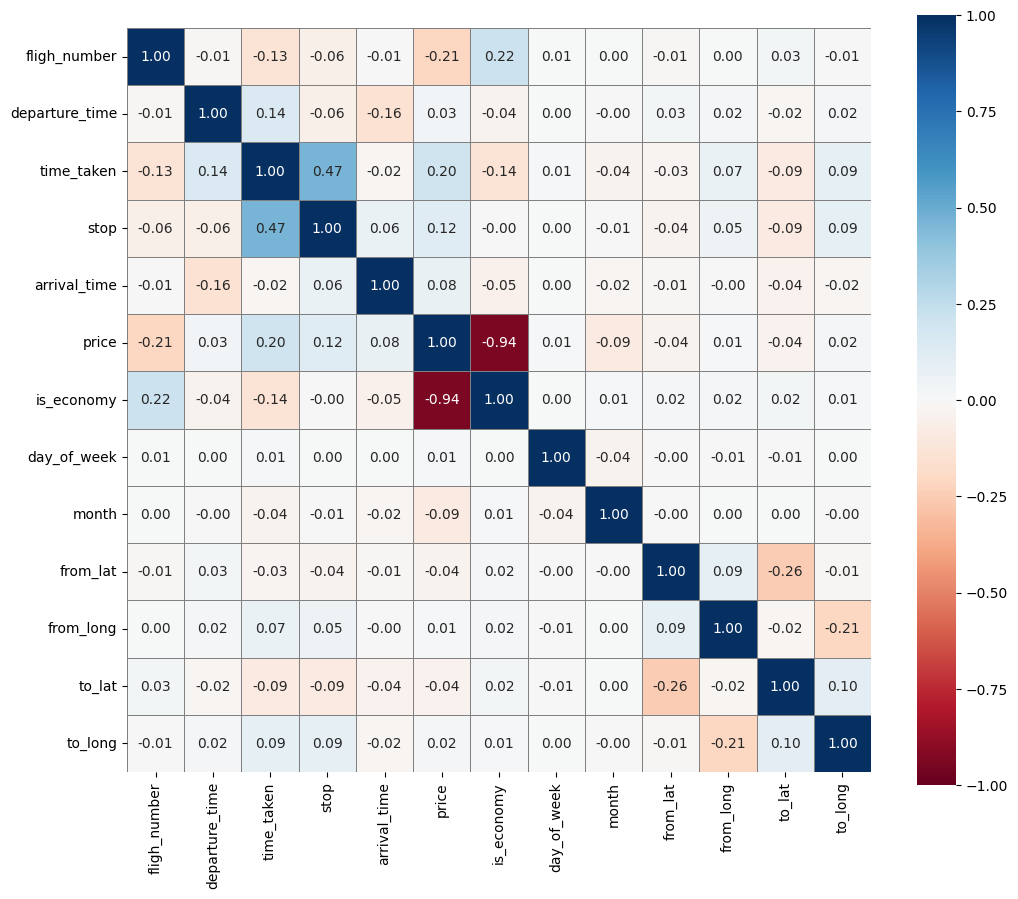

In [ ]:
# drop categorical features
numerical_cols_df = drop_categorical_cols(flights_final_df)

# correlation between different variables
corr = numerical_cols_df.corr()

# set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# draw the heatmap
sns.heatmap(corr, cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
            square = True, annot = True, fmt = '.2f', linewidths = 0.5, linecolor = 'grey')

## Geographical Data Visualization
We would like to visualize the destination in the dataset using a map!

*   Download the relevant pkg for the Basemap
*   Import airport geo info csv
*   Mark data on the map


### Download Relevant Packages for BaseMap

In [ ]:
!apt install libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.2.0rel.tar.gz
!pip install pyproj==1.9.6
!python -m pip install basemap
from mpl_toolkits.basemap import Basemap as Basemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 132.4 MB 14.7 MB/s 0:00:16
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 119.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 7.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for basemap
  Running setup.py clean for ba

### Helper Function to Draw the Geomap
Ref: https://makersportal.com/blog/2018/7/20/geographic-mapping-from-a-csv-file-using-python-and-basemap

In [ ]:
def draw_geographical_graph(lats, lons, zoom_scale_lats = 20,  zoom_scale_lons = 2, title= "Map"):
  # How much to zoom from coordinates (in degrees)
  # Setup the bounding box for the zoom and bounds of the map
  bbox = [np.min(lats)-zoom_scale_lats,np.max(lats)+zoom_scale_lats,\
          np.min(lons)-zoom_scale_lons,np.max(lons)+zoom_scale_lons]

  plt.figure(figsize=(6,6))
  # draw parallels, meridians, and color boundaries
  # Define the projection, scale, the corners of the map, and the resolution.
  m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
              llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

  # Draw coastlines and fill continents and water with color
  m.drawcoastlines()
  m.fillcontinents(color='peru',lake_color='dodgerblue')

  # draw parallels, meridians, and color boundaries
  m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/10),labels=[1,0,0,0])
  m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/10),labels=[0,0,0,1],rotation=45)
  m.drawmapboundary(fill_color='dodgerblue')

  # build and plot coordinates onto map
  x,y = m(lons,lats)
  m.plot(x,y,'r*',markersize=5)
  plt.title(title)
  png_name = title+".png"
  plt.savefig(png_name, format='png', dpi=500)
  plt.show()

### Draw the Map for Flight's Destination
We merged two dataframe in order to mark the data points in a real geographical map.
<br>Each red point in the map corresponds to one destination point.

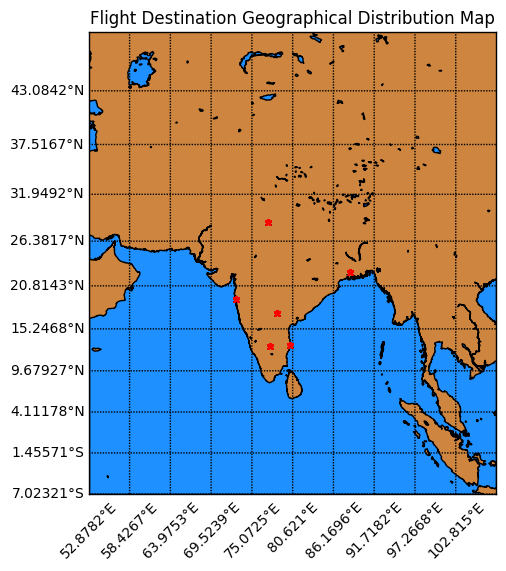

In [ ]:
to_lat = list(flights_final_df['to_lat'])
to_long= list(flights_final_df['to_long'])
title = "Flight Destination Geographical Distribution Map"
zoom_scale_lats = 20;
zoom_scale_lons = 20;
draw_geographical_graph(to_lat, to_long, zoom_scale_lats, zoom_scale_lons, title)

## Time Data Visualization

### Distributed plot for each month
This section involves creating and visualizing plots that show the distribution of data for each month. 

In [ ]:
# total flights and duration for each month
departure_month = flights_final_df.groupby('month', as_index = False).agg(total_flight=('month', 'size'), total_duration=('time_taken', 'sum'))
departure_month

,month,total_flight,total_duration
0,2,100569,76098649.0
1,3,199645,144000161.0


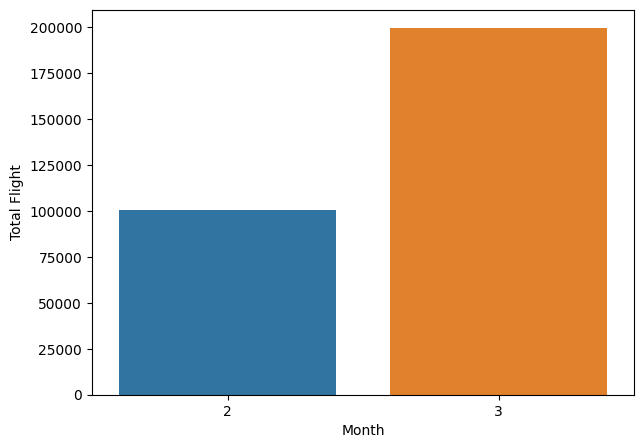

In [ ]:
# show total flight of each month
plt.figure(figsize=(7,5))
plt.xlim(0,2000)
sns.barplot(data=departure_month, x="month", y="total_flight").set(xlabel = 'Month', ylabel = 'Total Flight')
plt.show()

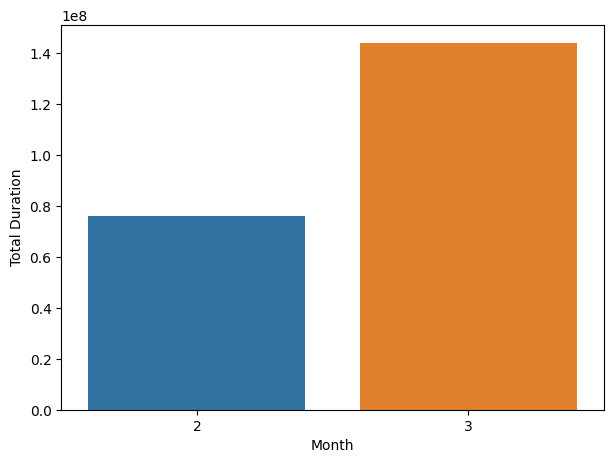

In [ ]:
# show total duration of each month
plt.figure(figsize=(7,5))
plt.xlim(0,2000)
sns.barplot(data=departure_month, x="month", y="total_duration").set(xlabel = 'Month', ylabel = 'Total Duration')
plt.show()

### Distributed plot for time of the day
This section involves creating and visualizing plots that show the distribution of data for time of the day.

In [ ]:
# departure time distribution for time of the day
distributed_time = flights_final_df.groupby('departure_time', as_index = False).agg(total_flight=('departure_time', 'size'), total_duration=('time_taken', 'sum'))
distributed_time

,departure_time,total_flight,total_duration
0,10,104,54640.0
1,15,15,6975.0
2,25,98,30945.0
3,30,74,20610.0
4,45,12,3620.0
...,...,...,...
246,1415,267,110600.0
247,1420,156,77610.0
248,1425,298,181100.0
249,1430,108,32030.0


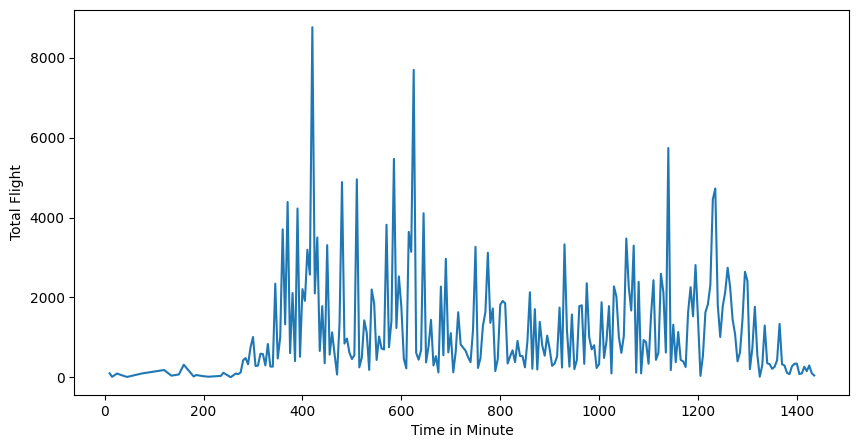

In [ ]:
# show total flights for departure time in minute
plt.figure(figsize=(10,5))
sns.lineplot(data=distributed_time, x="departure_time", y="total_flight").set(xlabel = 'Time in Minute', ylabel = 'Total Flight')
plt.show()

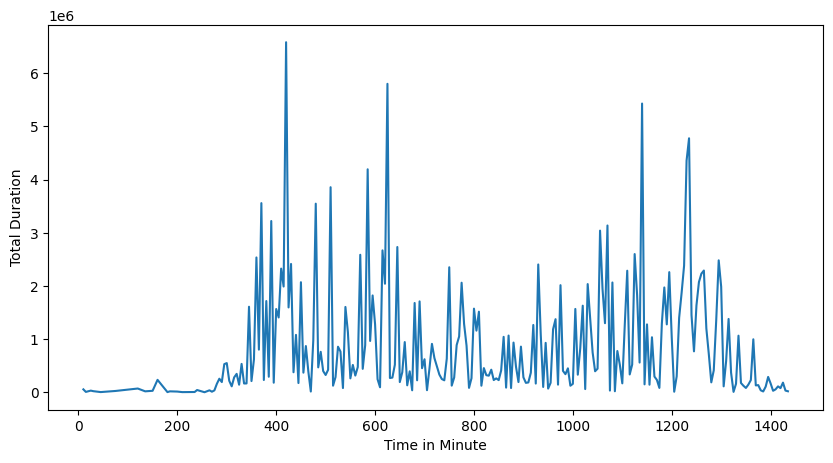

In [ ]:
# show total duration for departure time in minute
plt.figure(figsize=(10,5))
sns.lineplot(data=distributed_time, x="departure_time", y="total_duration").set(xlabel = 'Time in Minute', ylabel = 'Total Duration')
plt.show()

In [ ]:
# arrival time distribution for time of the day
distributed_time_arr = flights_final_df.groupby('arrival_time', as_index = False).agg(total_flight=('arrival_time', 'size'), total_duration=('time_taken', 'sum'))
distributed_time_arr

,arrival_time,total_flight,total_duration
0,5,535,235265.0
1,10,2678,1787635.0
2,15,83,38080.0
3,20,390,147435.0
4,25,581,224785.0
...,...,...,...
261,1420,1332,1061105.0
262,1425,2089,1052440.0
263,1430,1682,1081955.0
264,1435,2571,1621045.0


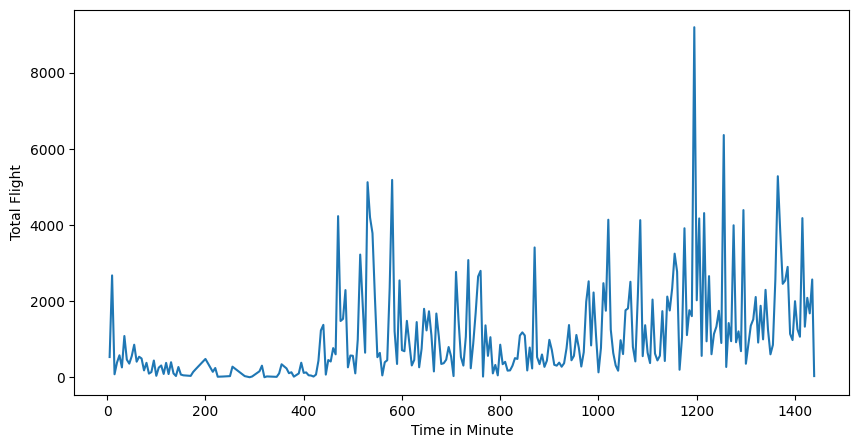

In [ ]:
# show total flights for arrival time in minute
plt.figure(figsize=(10,5))
sns.lineplot(data = distributed_time_arr, x="arrival_time", y="total_flight").set(xlabel = 'Time in Minute', ylabel = 'Total Flight')
plt.show()

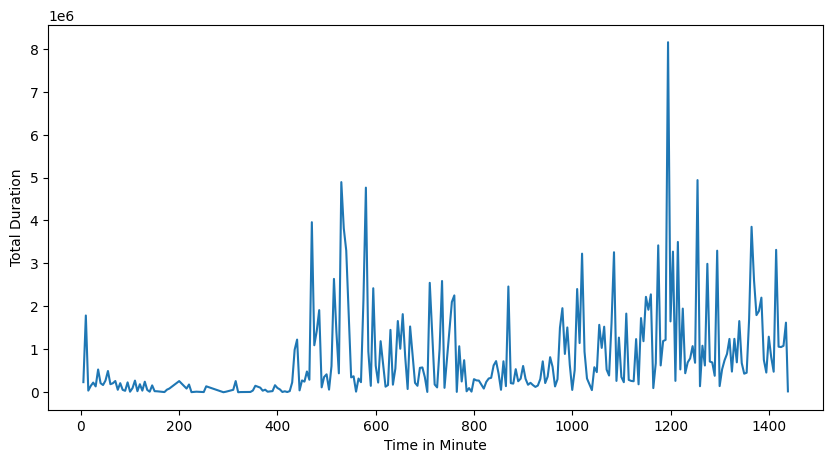

In [ ]:
# show total duration for arrival time in minute
plt.figure(figsize=(10,5))
sns.lineplot(data = distributed_time_arr, x="arrival_time", y="total_duration").set(xlabel = 'Time in Minute', ylabel = 'Total Duration')
plt.show()

## More Interesting Queries & Visualization

###  Lowest & Highest average price by airline
This section involves analyzing the prices of airline tickets and identifying the airlines with the highest and lowest average prices. This can provide insights into the pricing strategies of different airlines.

In [ ]:
# extract lowest and highest avg price and the conresponding airline
airline_price = flights_final_df.groupby('airline', as_index = False).agg(average_price = ('price', 'mean'))
airline_price = airline_price.sort_values(by='average_price', ascending = True).reset_index(drop = True)
lowest_price = airline_price.head(1)
highest_price = airline_price.tail(1)

print(lowest_price)
print(highest_price)

   airline  average_price
0  AirAsia    4091.072742
   airline  average_price
6  Vistara   30396.536302


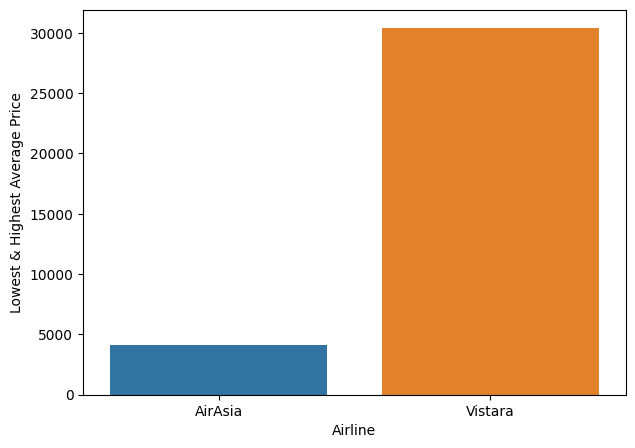

In [ ]:
# show lowest and highest avg price and the conresponding airline
distributed_price = pd.concat([lowest_price, highest_price])

plt.figure(figsize=(7,5))
plt.xlim(0,2000)
sns.barplot(data = distributed_price, x = "airline", y = "average_price").set(xlabel = 'Airline', ylabel = 'Lowest & Highest Average Price')
plt.show()

### Lowest price by departure city and arrival city
This section involves analyzing the prices of airline tickets and identifying the cities with the lowest prices for a given departure and arrival location. By analyzing these prices, we can gain insights into the pricing strategies of different airlines for specific routes.

In [ ]:
# lowest price by departure city
lowest_price = flights_complete_feature_df.groupby('from', as_index = False).agg(average_price=('price', 'mean'))
lowest_price_by_departure_city = lowest_price.sort_values(by='average_price', ascending=True).head(1)
lowest_price_by_departure_city

,from,average_price
2,Delhi,18951.326639


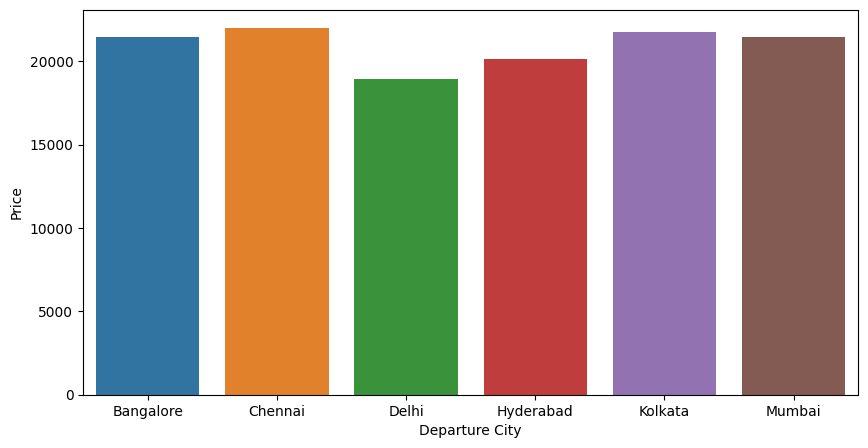

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
sns.barplot(data = lowest_price, x="from", y="average_price").set(xlabel = 'Departure City', ylabel = 'Price')
plt.show()

In [ ]:
# lowest price by arrival city
lowest_price_arr = flights_complete_feature_df.groupby('to', as_index = False).agg(average_price=('price', 'mean'))
lowest_price_by_arrival_city = lowest_price_arr.sort_values(by='average_price', ascending=True).head(1)
lowest_price_by_arrival_city

,to,average_price
2,Delhi,18436.76787


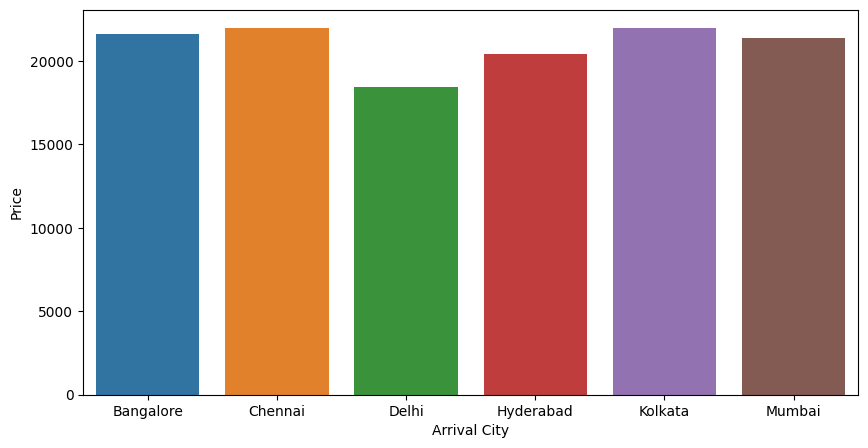

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
sns.barplot(data = lowest_price_arr, x = "to", y = "average_price").set(xlabel = 'Arrival City', ylabel = 'Price')
plt.show()

### Lowest price by the day of the week
This section involves analyzing the prices of airline tickets and identifying the days of the week with the lowest prices. This analysis can provide insights into the pricing strategies of different airlines.

In [ ]:
# departure lowest price by the day of the week
dep_lowest_price = flights_final_df.groupby('day_of_week', as_index = False).agg(average_price = ('price', 'mean'))
weekdays = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
dep_lowest_price['day_of_week'] = dep_lowest_price['day_of_week'] .replace(weekdays)

dep_lowest_price.sort_values('average_price', inplace = True)
dep_lowest_price.reset_index(drop = True)
dep_lowest_price

,day_of_week,average_price
1,Tuesday,20558.033314
3,Thursday,20579.056300
2,Wednesday,20646.514141
0,Monday,20711.041006
4,Friday,20802.046807
6,Sunday,21439.603855
5,Saturday,21513.084286


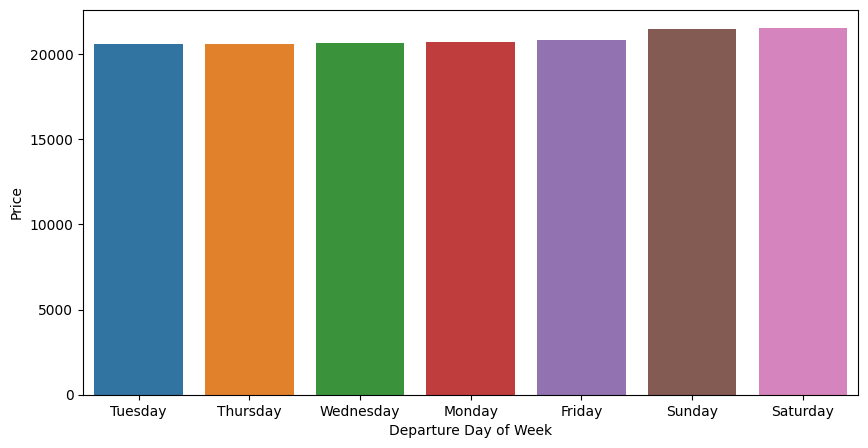

In [ ]:
plt.figure(figsize = (10,5))
plt.xlim(0,2000)
sns.barplot(data = dep_lowest_price, x = "day_of_week", y = "average_price").set(xlabel = 'Departure Day of Week', ylabel = 'Price')
plt.show()

### The busiest month by flight
This section involves analyzing flight data to identify the month with the highest number of flights.

In [ ]:
# find busiest month of flight
top_month = flights_final_df.groupby('month', as_index = False).agg(total_flight=('month', 'size'))
top_month_by_flights = top_month.sort_values(by='total_flight', ascending=False).iloc[0]
top_month_by_flights

month                3
total_flight    199645
Name: 1, dtype: int64

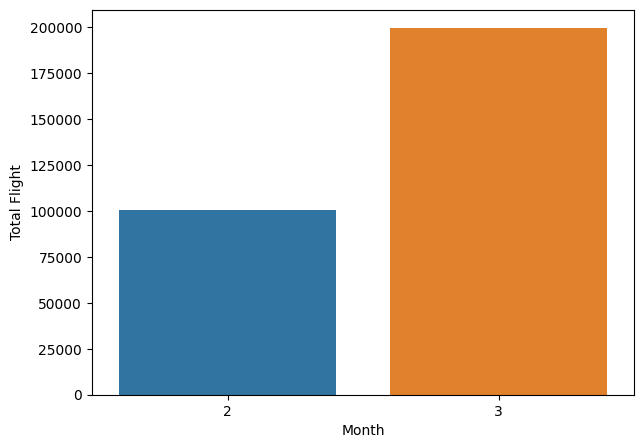

In [ ]:
plt.figure(figsize = (7,5))
plt.xlim(0,2000)
sns.barplot(data = top_month, x="month", y="total_flight").set(xlabel = 'Month', ylabel = 'Total Flight')
plt.show()

### Top 5 popular city that people like to go
This section involves analyzing travel data to identify the top five cities that people prefer to visit. This analysis can provide insights into popular tourist destinations

In [ ]:
# find top 5 popular cities that people like to travel
popular_dest_countries = flights_complete_feature_df[['to', 'price']].groupby('to', as_index = False).count()
popular_dest_countries = popular_dest_countries.rename(columns = {'price': 'flight_count'})
popular_dest_countries = popular_dest_countries.sort_values('flight_count', ascending = False).reset_index(drop = True).head(5)
popular_dest_countries 

,to,flight_count
0,Mumbai,59097
1,Delhi,57360
2,Bangalore,51089
3,Kolkata,49534
4,Hyderabad,42766


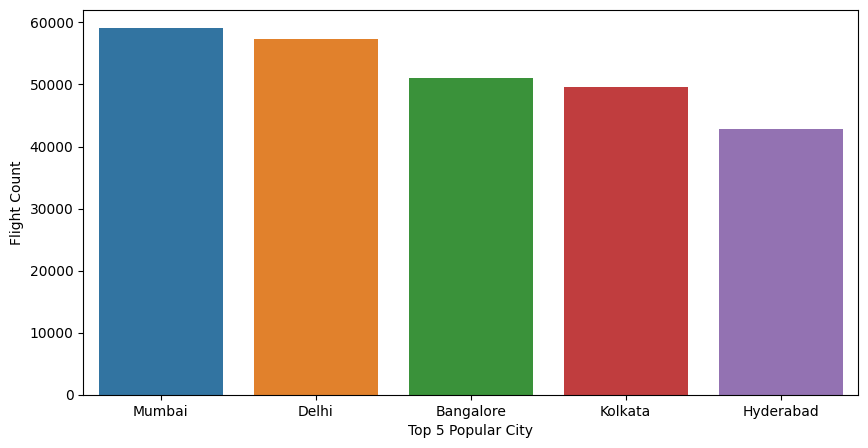

In [ ]:
plt.figure(figsize = (10,5))
plt.xlim(0,2000)
sns.barplot(data = popular_dest_countries, x = "to", y = "flight_count").set(xlabel = 'Top 5 Popular City', ylabel = 'Flight Count')
plt.show()

### Top 5 airline that people like to choose
This section involves analyzing airline data to identify the top five airlines that people prefer to fly with. This analysis can provide insights into the preferences and priorities of air travelers.

In [ ]:
# find top 5 popular airlines that people like to choose
popular_airline = flights_final_df.groupby('airline', as_index = False).agg(flight_count = ('airline', 'value_counts'))
popular_airline = popular_airline.sort_values('flight_count', ascending = False).head()
popular_airline

,airline,flight_count
6,Vistara,127859
0,Air India,80892
3,Indigo,43120
2,GO FIRST,23173
1,AirAsia,16098


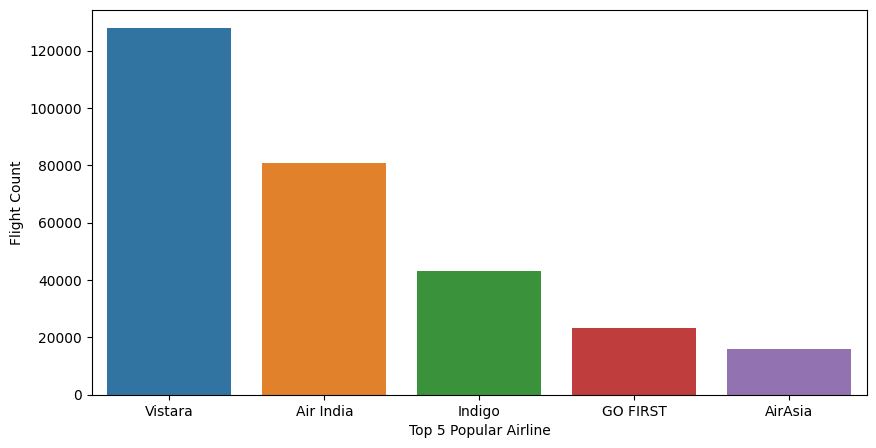

In [ ]:
plt.figure(figsize = (10,5))
plt.xlim(0,2000)
sns.barplot(data = popular_airline, x = "airline", y = "flight_count").set(xlabel = 'Top 5 Popular Airline', ylabel = 'Flight Count')
plt.show()

# Model Training & Prediction

## Packages Import

In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import torch
import torch.nn as nn 

## Helper Functions

In [ ]:
# initialize different linear regression model
def regularization_with_diff_params(model_type, alpha_values, x_train, x_test, y_train, y_test, model_list= None, train_accuracy_list= None, test_accuracy_list=None):
  # initialize the result 
  if train_accuracy_list == None:
    train_accuracy_list = [];
  if test_accuracy_list == None:
    test_accuracy_list = [];
  if model_list == None:
    model_list = [];

  for test_alpha in alpha_values:
    # check if model is L1, L2, or Elastic 
    if model_type == 'Lasso':
      model = Lasso(test_alpha, max_iter = 100000)
    if model_type == 'Ridge':
      model = Ridge(test_alpha, max_iter = 100000)
    if model_type == 'Elastic':
      model = ElasticNet(test_alpha, max_iter = 100000)

    model.fit(x_train, y_train)
    model_list.append(model); 
    train_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    # format the result for better result display 
    test_alpha = format(test_alpha, '.6f')
    train_accuracy = format(train_accuracy, '.13f')
    test_accuracy = format(test_accuracy, '.13f')
    print("{} Model with Alpha {} - Train Accuracy:{} vs Test Accuracy:{}".format(model_type, test_alpha, train_accuracy, test_accuracy));

  return model_list, train_accuracy_list, test_accuracy_list

# initialize different decision tree model
def decision_tree_with_diff_params(model_type, depth_list, x_train, x_test, y_train, y_test, model_list= None, train_accuracy_list= None, test_accuracy_list=None):
  for depth in depth_list: 
    # initialize the classifiers
    if model_type == 'Decision Tree':
      clf = tree.DecisionTreeRegressor(max_depth = depth)
    if model_type == 'XGBoost':
      clf = xgb.XGBRegressor(n_estimators=10, max_depth = depth)
    clf.fit(x_train, y_train);
    model_list.append(clf);
    train_score = clf.score(x_train, y_train);
    train_accuracy_list.append(train_score);
    test_score = clf.score(x_test, y_test);
    test_accuracy_list.append(test_score);
    depth = format(depth, '.1f');
    train_accuracy = format(train_score, '.13f');
    test_accuracy = format(test_score, '.13f');
    print("{} with Max Depth {} - Train Accuracy: {} vs Test Accuracy: {}".format(model_type, depth, train_accuracy, test_accuracy));

# training vs testing curve
def learning_curve(model_name, tune_param_name, params, train_accuracies, test_accuracies):
  plt.plot(params, train_accuracies, '-', label = 'train_accuracy')
  plt.plot(params, test_accuracies, '--', label = 'test_accuracy')
  plt.title('{} Model Accuracy with different {} params'.format(model_name, tune_param_name))
  plt.xlabel(tune_param_name)
  plt.ylabel('Accuracy')
  plt.legend(loc= 0, prop={'size': 10})
  plt.show()

# select the best model by training accuracy
def select_best_model(model_type, hyperparam, params, model_list, train_accuracies, test_accuracies, x_test, y_test):
  index = np.argmax(test_accuracies);
  best_model = model_list[index]
  best_hyperparam = params[index]
  best_model_train_score = train_accuracies[index]
  best_model_test_score = test_accuracies[index]
  best_model_y_hat = best_model.predict(x_test)
  best_model_y_hat = best_model_y_hat.reshape(60043,1)
  best_model_RMSE = mean_squared_error(y_test, best_model_y_hat) ** 0.5
  best_model_errors = y_test - best_model_y_hat
  #mean absolute error
  best_model_MAE = np.average(np.abs(best_model_errors))
  print("----- {} Model Selection Summary -----".format(model_type));
  print("----- We select the best model by highest training accuracy. ----");
  print("Best {} Model has hyperparameter [{}] with value [{}].".format(model_type, hyperparam, best_hyperparam))
  print("Best {} Model Training Accuracy: [{}].".format(model_type, best_model_train_score))
  print("Best {} Model Testing Accuracy: [{}].".format(model_type, best_model_test_score))
  print("Best {} Model RMSE: [{}]".format(model_type, best_model_RMSE))
  print("Best {} Model MAE: [{}]".format(model_type, best_model_MAE))
  return best_model

## One Hot Encoding

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. With one-hot encoding, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. 

We are going to apply one-hot encoding to the following column: `airline` using `pd.get_dummies()`. 

Airline features `7` catergories.

In [ ]:
flights_final_df['airline'].nunique()

7

In [ ]:
flights_final_df.info(verbose = True);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300214 entries, 0 to 206771
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   airline         300214 non-null  object 
 1   fligh_number    300214 non-null  int64  
 2   departure_time  300214 non-null  int64  
 3   time_taken      300214 non-null  float64
 4   stop            300214 non-null  int64  
 5   arrival_time    300214 non-null  int64  
 6   price           300214 non-null  float64
 7   is_economy      300214 non-null  int64  
 8   day_of_week     300214 non-null  int64  
 9   month           300214 non-null  int64  
 10  from_lat        300214 non-null  float64
 11  from_long       300214 non-null  float64
 12  to_lat          300214 non-null  float64
 13  to_long         300214 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 34.4+ MB


In [ ]:
# columns to be converted
categorical_cols = ['airline']

flights_final_ohe = flights_final_df.copy()
flights_final_ohe = pd.get_dummies(flights_final_ohe, columns=categorical_cols)

flights_final_ohe

,fligh_number,departure_time,time_taken,stop,arrival_time,price,is_economy,day_of_week,month,from_lat,from_long,to_lat,to_long,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Vistara
0,868,1080,120.0,0,1200,25612.0,0,5,2,28.651718,77.221939,19.078545,72.878176,1,0,0,0,0,0,0
79190,880,805,1230.0,1,595,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186,0,0,0,0,0,0,1
79189,870,1235,1185.0,1,980,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186,0,0,0,0,0,0,1
79188,890,1060,975.0,1,595,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186,0,0,0,0,0,0,1
79187,860,410,955.0,1,1365,51707.0,0,3,2,17.360589,78.474061,13.083694,80.270186,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27309,977,1140,1495.0,1,1195,7221.0,1,3,3,28.651718,77.221939,22.572646,88.363895,0,0,0,0,0,0,1
27310,955,1065,1570.0,1,1195,7221.0,1,3,3,28.651718,77.221939,22.572646,88.363895,0,0,0,0,0,0,1
27311,879,680,325.0,1,1005,6891.0,1,3,3,28.651718,77.221939,22.572646,88.363895,1,0,0,0,0,0,0
27313,171,1100,795.0,1,455,7072.0,1,3,3,28.651718,77.221939,22.572646,88.363895,0,0,1,0,0,0,0


In [ ]:
# create features and label for training
features = flights_final_ohe.drop(columns='price')

label = flights_final_ohe[['price']]

## PCA to Reduce Dimensionality

The goal of Principal Component Analysis is to reduce the number of dimensions of our features.

_**Initial PCA**_

As a first step, instantiate and fit `PCA` from scikit-learn on your training set. We are not reducing the dimensionality of our data in this step but rather trying to find what would be the ideal number of Principal Components to choose. 

In [ ]:
# Intermediate step to address scale-invariance
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

# We first pick the number of features in flights_final_ohe as number of principal components
n_components = 19
pca = PCA()

# Instantiate and Fit PCA
x_pca = pca.fit_transform(x_scaled)

_**Cumulative Explained Variance Ratios**_

Create an array of explained variance ratios and store it into a variable called `explained_variance_ratios`. Also, calculate the _cumulative_ explained variance ratios and store that into another variable called `cum_evr`.

In [ ]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_

In [ ]:
# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)

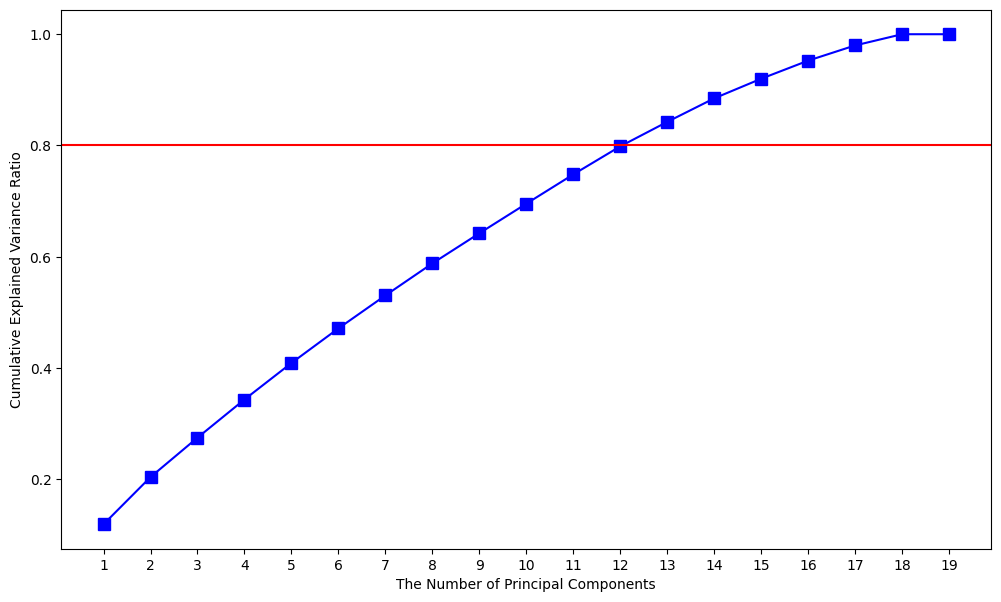

In [ ]:
# find optimal num components to use (n) by plotting explained variance ratio (2 points)

# Plot
plt.figure(figsize = (12,7))
plt.xticks(range(len(cum_evr)), range(1, len(cum_evr)+1))
plt.plot(cum_evr, 's-', color = 'blue', markersize = 8)

# Aesthetics
plt.xlabel('The Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.axhline(y = 0.8, color = 'red', linestyle = '-')
plt.show()

_**Split Data into Train and Test**_

Use scikit-learn's `train_test_split` function to split data for regression into train and test sets. The split should be 80-20 meaning 80% for training and rest for testing.

Set the `seed` variable to 42 and then set the parameter to `random_state = seed` and store the resulting splits as `x_train, x_test, y_train,` and `y_test`. This is necessary in order for our autograder to accurately evaluate your answer.

In [ ]:
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x_scaled, label, test_size=0.20, random_state=seed)
print("Training Data Size: features x:{},  label y:{}".format(x_train.shape, y_train.shape))
print("Testing Data Size: features x:{},  label y:{}".format(x_test.shape, y_test.shape))

Training Data Size: features x:(240171, 19),  label y:(240171, 1)
Testing Data Size: features x:(60043, 19),  label y:(60043, 1)


_**Final PCA**_

Using our results above, we know that the number of components to keep should be `16` because it explains **at least 80% of total variance** in the dataset.

In [ ]:
# Refit and transform on training with parameter 12 (as deduced from the last step) 
pca = PCA(n_components = 12)

x_train_pca = pca.fit_transform(x_train)

# Transform on Testing Set and store it as `x_test_pca`
x_test_pca = pca.transform(x_test)

## Multiple Linear Regression Model

#### (a) Linear Regression (Unregularized)

Use the `LinearRegression` class in scikit-learn to perform Linear Regression. We initialize a Linear regression model named `reg` with default parameters, fit the model to the training set, and then make predictions on the testing set.

In [ ]:
# Initialize model with default parameters and fit it on the training set
reg = LinearRegression()
reg.fit(x_train_pca, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg.predict(x_test_pca)

# Find the R-squared score and store the value in `score`
train_accuracy = reg.score(x_train_pca, y_train)
test_accuracy = reg.score(x_test_pca, y_test)
print("Unregularized Linear Regression Model Performance: Train_accuracy: {} vs Test_accuracy: {}".format(train_accuracy, test_accuracy))

Unregularized Linear Regression Model Performance: Train_accuracy: 0.5457694460586641 vs Test_accuracy: 0.5460905446317654


#### (b) Lasso Regression

We use `Lasso` class in scikit-learn to perform $L_1$ Regularized Linear Regression.

$$\frac{1}{n}\sum_{i = 1}^n(x^i·w-y^i)^2+λ_1\sum_{j = 1}^p·|w^j|$$

We initialize a Lasso regression model with with different regularization strength `alpha` and fit the model to the training set, and then make predictions on the testing set. We have to apply `standard scaling` and `pca processing` on training and testing sets because Lasso regularization is generally only effective if we have uncorrelated features.

<b>Conclusion:</b>
1. By training the lasso regression model with different alpha values and comparing the training accuracy of different alpha values, we find the best lasso regression model.
2. The best lasso regression model will have $\alpha = 0.001$. 
3. By using this model, accuracy on the training dataset will be around $0.5458$. 
4. By using this model, accuracy on the testing dataset will be around $0.5461$.
 <br> rooted mean square error: $RMSE=15346.7954$.  
 mean absolute error: $MAE=13149.5759$.

In [ ]:
# Initialize model with different alpha values
alpha_list = [5, 4, 3, 2, 1, 0.5, 0.1, 0.05, 0.01, 0.001]
r1_list, r1_train_accuracies, r1_test_accuracies = regularization_with_diff_params('Lasso', 
                                                                                   alpha_list, 
                                                                                   x_train_pca,
                                                                                   x_test_pca,
                                                                                   y_train,
                                                                                   y_test)

Lasso Model with Alpha 5.000000 - Train Accuracy:0.5457689603829 vs Test Accuracy:0.5460846188180
Lasso Model with Alpha 4.000000 - Train Accuracy:0.5457691352262 vs Test Accuracy:0.5460858793197
Lasso Model with Alpha 3.000000 - Train Accuracy:0.5457692712154 vs Test Accuracy:0.5460871021518
Lasso Model with Alpha 2.000000 - Train Accuracy:0.5457693683505 vs Test Accuracy:0.5460882873146
Lasso Model with Alpha 1.000000 - Train Accuracy:0.5457694266316 vs Test Accuracy:0.5460894348079
Lasso Model with Alpha 0.500000 - Train Accuracy:0.5457694412019 vs Test Accuracy:0.5460899944285
Lasso Model with Alpha 0.100000 - Train Accuracy:0.5457694458644 vs Test Accuracy:0.5460904353445
Lasso Model with Alpha 0.050000 - Train Accuracy:0.5457694460101 vs Test Accuracy:0.5460904900352
Lasso Model with Alpha 0.010000 - Train Accuracy:0.5457694460567 vs Test Accuracy:0.5460905337200
Lasso Model with Alpha 0.001000 - Train Accuracy:0.5457694460586 vs Test Accuracy:0.5460905435408


##### Model Selection and Performance Analysis

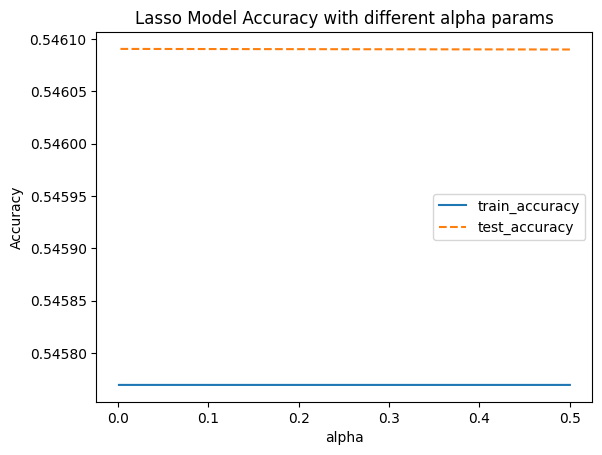

In [ ]:
learning_curve(model_name='Lasso', 
                       tune_param_name='alpha', 
                       params= alpha_list[5:],
                       train_accuracies = r1_train_accuracies[5:], 
                       test_accuracies = r1_test_accuracies[5:])

In [ ]:
best_lasso_model = select_best_model(model_type = 'Lasso Regression',
                  hyperparam = 'alpha',
                  params = alpha_list,
                  model_list = r1_list,
                  train_accuracies = r1_train_accuracies,
                  test_accuracies = r1_test_accuracies,
                  x_test = x_test_pca, 
                  y_test = y_test)

----- Lasso Regression Model Selection Summary -----
----- We select the best model by highest training accuracy. ----
Best Lasso Regression Model has hyperparameter [alpha] with value [0.001].
Best Lasso Regression Model Training Accuracy: [0.5457694460586446].
Best Lasso Regression Model Testing Accuracy: [0.5460905435407573].
Best Lasso Regression Model RMSE: [15346.795376333195]
Best Lasso Regression Model MAE: [13149.575893393021]


#### (c) Ridge Regression

We use `Ridge` class in scikit-learn to perform $L_2$ Regularized Linear Regression.

$$\frac{1}{n}\sum_{i = 1}^n(x^i·w-y^i)^2+λ_2w^T·w$$

We initialize a Ridge regression model with with different regularization strength `alpha` and fit the model to the training set, and then make predictions on the testing set. Ridge works well even if there is multicollinearity, so we can use data `without pca processing`.

<b>Conclusion:</b>
1. By training the ridge regression model with different alpha values and comparing the training accuracy of different alpha values, we find the best ridge regression model.
2. The best ridge regression model will have $\alpha = 0.001$. 
3. By using this model, accuracy on the training dataset will be around $0.9076$.
4. By using this model, accuracy on the testing dataset will be around $0.9078$.
 <br> rooted mean square error: $RMSE=6916.2445$.  
 mean absolute error: $MAE=4503.2155$.

In [ ]:
# Initialize model with different alpha values
alpha_list = [5, 4, 3, 2, 1, 0.5, 0.1, 0.05, 0.01, 0.001]
r2_list, r2_train_accuracies, r2_test_accuracies = regularization_with_diff_params('Ridge', 
                                                                                   alpha_list, 
                                                                                   x_train,
                                                                                   x_test,
                                                                                   y_train,
                                                                                   y_test)

Ridge Model with Alpha 5.000000 - Train Accuracy:0.9075953755752 vs Test Accuracy:0.9078118253987
Ridge Model with Alpha 4.000000 - Train Accuracy:0.9075953757473 vs Test Accuracy:0.9078118558618
Ridge Model with Alpha 3.000000 - Train Accuracy:0.9075953758812 vs Test Accuracy:0.9078118862874
Ridge Model with Alpha 2.000000 - Train Accuracy:0.9075953759768 vs Test Accuracy:0.9078119166753
Ridge Model with Alpha 1.000000 - Train Accuracy:0.9075953760341 vs Test Accuracy:0.9078119470257
Ridge Model with Alpha 0.500000 - Train Accuracy:0.9075953760485 vs Test Accuracy:0.9078119621867
Ridge Model with Alpha 0.100000 - Train Accuracy:0.9075953760531 vs Test Accuracy:0.9078119743088
Ridge Model with Alpha 0.050000 - Train Accuracy:0.9075953760532 vs Test Accuracy:0.9078119758237
Ridge Model with Alpha 0.010000 - Train Accuracy:0.9075953760533 vs Test Accuracy:0.9078119770355
Ridge Model with Alpha 0.001000 - Train Accuracy:0.9075953760533 vs Test Accuracy:0.9078119773081


##### Model Selection and Performance Analysis

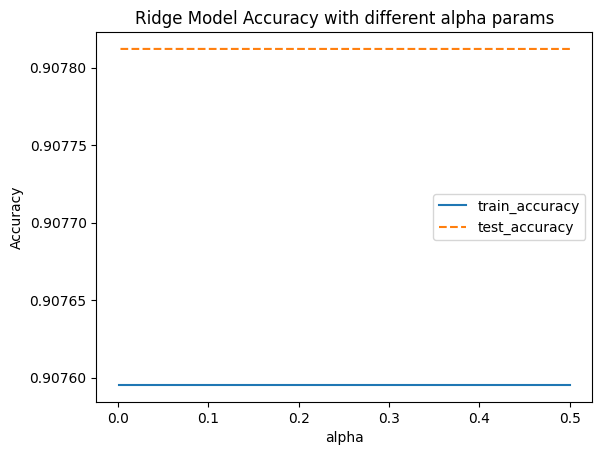

In [ ]:
learning_curve(model_name='Ridge', 
                       tune_param_name='alpha', 
                       params= alpha_list[5:],
                       train_accuracies = r2_train_accuracies[5:], 
                       test_accuracies = r2_test_accuracies[5:])

In [ ]:
best_ridge_model = select_best_model(model_type = 'Ridge Regression',
                  hyperparam = 'alpha',
                  params = alpha_list,
                  model_list = r2_list,
                  train_accuracies = r2_train_accuracies,
                  test_accuracies = r2_test_accuracies,
                  x_test = x_test, 
                  y_test = y_test)

----- Ridge Regression Model Selection Summary -----
----- We select the best model by highest training accuracy. ----
Best Ridge Regression Model has hyperparameter [alpha] with value [0.001].
Best Ridge Regression Model Training Accuracy: [0.9075953760532596].
Best Ridge Regression Model Testing Accuracy: [0.9078119773081108].
Best Ridge Regression Model RMSE: [6916.244490616044]
Best Ridge Regression Model MAE: [4503.215516301843]


#### (d) Elastic Net Regression
`Elastic Net` Regression combines $L_1$ and $L_2$ regularization, which results in a penalty term that has both the absolute value of the coefficients (as in $L_1$ regularization) and the square of the coefficients (as in $L_2$ regularization).

$$\frac{1}{n}\sum_{i = 1}^n(x^i·w-y^i)^2+λ_1\sum_{j = 1}^p·|w^j|+λ_2w^T·w$$

Similar to Ridge regression, we can initialize an Elastic Net regression model with different regularization strengths (alpha) and fit the model to the training set. We can then use the model to make predictions on the testing set. As Elastic Net combines both L1 and L2 with most of the benefits of each, so we can use data `without pca processing`.

<b>Conclusion:</b>
1. By training the elastic net regression model with different alpha values and comparing the training accuracy of different alpha values, we find the best ridge regression model.
2. The best elastic net regression model will have $\alpha = 0.001$. 
3. By using this model, accuracy on the training dataset will be around $0.9076$.  
4. By using this model, accuracy on the testing dataset will be around $0.9078$.
 <br> rooted mean square error: $RMSE=6916.3911$.  
 mean absolute error: $MAE=4503.3841$.

In [ ]:
# Initialize model with different alpha values
alpha_list = [5, 4, 3, 2, 1, 0.5, 0.1, 0.05, 0.01, 0.001]
e_list, e_train_accuracies, e_test_accuracies = regularization_with_diff_params('Elastic',
                                                                                alpha_list,
                                                                                x_train,
                                                                                x_test,
                                                                                y_train,
                                                                                y_test)

Elastic Model with Alpha 5.000000 - Train Accuracy:0.4993443927655 vs Test Accuracy:0.4978448910484
Elastic Model with Alpha 4.000000 - Train Accuracy:0.5529565177318 vs Test Accuracy:0.5513956382569
Elastic Model with Alpha 3.000000 - Train Accuracy:0.6194882176264 vs Test Accuracy:0.6178911556514
Elastic Model with Alpha 2.000000 - Train Accuracy:0.7038649345372 vs Test Accuracy:0.7023044090713
Elastic Model with Alpha 1.000000 - Train Accuracy:0.8111701243560 vs Test Accuracy:0.8098819061753
Elastic Model with Alpha 0.500000 - Train Accuracy:0.8700801404251 vs Test Accuracy:0.8692100928357
Elastic Model with Alpha 0.100000 - Train Accuracy:0.9052013128364 vs Test Accuracy:0.9050955653490
Elastic Model with Alpha 0.050000 - Train Accuracy:0.9069539810504 vs Test Accuracy:0.9069996037270
Elastic Model with Alpha 0.010000 - Train Accuracy:0.9075681994529 vs Test Accuracy:0.9077488772152
Elastic Model with Alpha 0.001000 - Train Accuracy:0.9075951006446 vs Test Accuracy:0.9078080685461


##### Model Selection and Performance Analysis

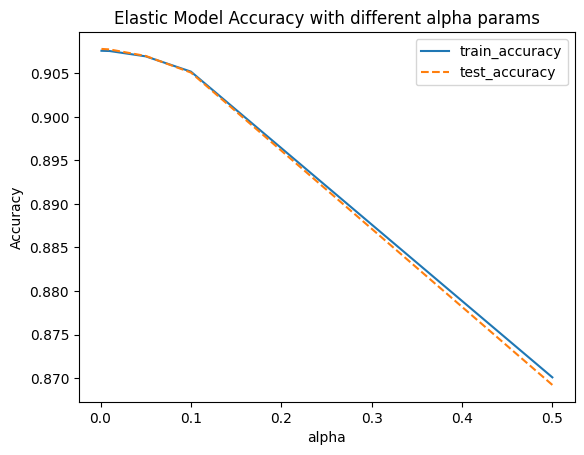

In [ ]:
learning_curve(model_name='Elastic', 
                       tune_param_name='alpha', 
                       params= alpha_list[5:],
                       train_accuracies = e_train_accuracies[5:], 
                       test_accuracies = e_test_accuracies[5:])

In [ ]:
best_elastic_model = select_best_model(model_type = 'Elastic Net Regression',
                  hyperparam = 'alpha',
                  params = alpha_list,
                  model_list = e_list,
                  train_accuracies = e_train_accuracies,
                  test_accuracies = e_test_accuracies,
                  x_test = x_test, 
                  y_test = y_test)

----- Elastic Net Regression Model Selection Summary -----
----- We select the best model by highest training accuracy. ----
Best Elastic Net Regression Model has hyperparameter [alpha] with value [0.001].
Best Elastic Net Regression Model Training Accuracy: [0.9075951006446332].
Best Elastic Net Regression Model Testing Accuracy: [0.9078080685460644].
Best Elastic Net Regression Model RMSE: [6916.391113065608]
Best Elastic Net Regression Model MAE: [4503.384094310954]


## Decision Tree Model
Decision Tree is a machine learning algorithm used for classification and regression tasks. A decision tree is a binary tree where each internal node represents a test on a feature, each branch represents an outcome of the test, and each leaf node represents a class label or a numerical value.

We can initialize the model with hyperparameters that control the complexity of the tree, such as the maximum depth, the minimum number of samples required to split an internal node, and the minimum number of samples required to be at a leaf node.

### (a) Decision Tree Regression
Decision Tree Regression is a type of regression analysis that uses a decision tree to model the relationship between a set of input features and a numerical output. Similar to Decision Tree Classification, a decision tree regression model is a binary tree where each internal node represents a test on a feature, each branch represents an outcome of the test, and each leaf node represents a numerical value.
*   Hyperparameter of decision tree model is the max_depth. 
<br>This parameter should be tuned. 
*   By training the model with every reasonable max_depth (from 2 to 20) and comparing the training & testing accuracy, we find the best model do prediction.

<b>Conclusion:</b>
1. By training the decision tree regression model with different max_depth values and comparing the training accuracy of different max_depth values, we find the best decision tree regression model.
2. The best elastic net regression model will have max_depth of $20$. 
3. By using this model, accuracy on the training dataset will be around $0.9842$.  
4. By using this model, accuracy on the testing dataset will be around $0.9681$.
 <br> rooted mean square error: $RMSE=4068.2314$.  
mean absolute error: $MAE=2017.6382$.

In [ ]:
# implement decision tree
depth_list= range(2, 22, 2);
model_list = list(); 
dt_train_accuracies = list();
dt_test_accuracies = list();
decision_tree_with_diff_params('Decision Tree',
                               depth_list,
                               x_train_pca,
                               x_test_pca,
                               y_train,
                               y_test,
                               model_list,
                               dt_train_accuracies,
                               dt_test_accuracies)

Decision Tree with Max Depth 2.0 - Train Accuracy: 0.6537396160946 vs Test Accuracy: 0.6479392510980
Decision Tree with Max Depth 4.0 - Train Accuracy: 0.8770009525609 vs Test Accuracy: 0.8787661441311
Decision Tree with Max Depth 6.0 - Train Accuracy: 0.9230670661114 vs Test Accuracy: 0.9215979980092
Decision Tree with Max Depth 8.0 - Train Accuracy: 0.9425551981018 vs Test Accuracy: 0.9411602444424
Decision Tree with Max Depth 10.0 - Train Accuracy: 0.9524496150735 vs Test Accuracy: 0.9496877503138
Decision Tree with Max Depth 12.0 - Train Accuracy: 0.9599010006028 vs Test Accuracy: 0.9560227980551
Decision Tree with Max Depth 14.0 - Train Accuracy: 0.9670604280325 vs Test Accuracy: 0.9609859348635
Decision Tree with Max Depth 16.0 - Train Accuracy: 0.9748741726201 vs Test Accuracy: 0.9656086811069
Decision Tree with Max Depth 18.0 - Train Accuracy: 0.9801501977007 vs Test Accuracy: 0.9675734860767
Decision Tree with Max Depth 20.0 - Train Accuracy: 0.9842465504662 vs Test Accuracy: 

##### Model Selection and Performance Analysis

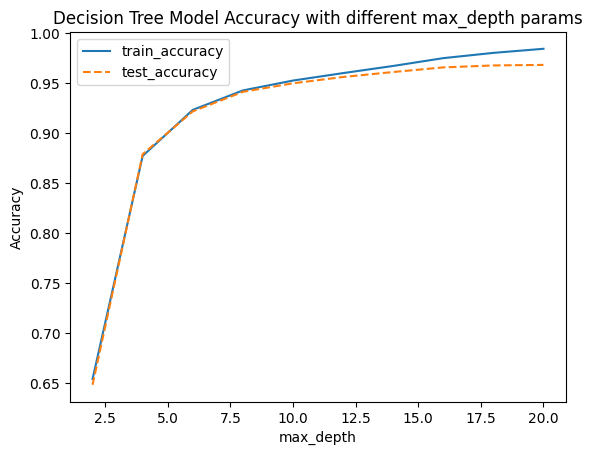

In [ ]:
learning_curve(model_name ='Decision Tree', 
                       tune_param_name ='max_depth', 
                       params = depth_list,
                       train_accuracies = dt_train_accuracies, 
                       test_accuracies = dt_test_accuracies)

In [ ]:
best_dt_model = select_best_model(model_type = 'Decision Tree Regression',
                  hyperparam = 'max_depth',
                  params = depth_list,
                  model_list = model_list,
                  train_accuracies = dt_train_accuracies,
                  test_accuracies = dt_test_accuracies,
                  x_test = x_test_pca, 
                  y_test = y_test)

----- Decision Tree Regression Model Selection Summary -----
----- We select the best model by highest training accuracy. ----
Best Decision Tree Regression Model has hyperparameter [max_depth] with value [20].
Best Decision Tree Regression Model Training Accuracy: [0.9842465504661806].
Best Decision Tree Regression Model Testing Accuracy: [0.9681258563208133].
Best Decision Tree Regression Model RMSE: [4066.7956489451713]
Best Decision Tree Regression Model MAE: [2019.5214063226856]


### (b) XGBoost Regression


XGBoost is an ensemble machine learning algorithm that uses gradient boosting. Its goal is to optimize both the model performance and the execution speed. It can be used for both regression and classification problems. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.

We can use the `XGBRegressor` class to perform XGBoost Regression.The XGBoost objective function used when predicting numerical values is the “reg:squarederror” loss function. We can use the model to set the number of boosting stages or limit the number of nodes in the tree to improve performance.

*   One hyperparameter of XGBoost Regression model is the max_depth. 
<br>This parameter should be tuned. 
*   By training the model with every reasonable max_depth (from 2 to 20) and comparing the training & testing accuracy, we find the best model do prediction.

<b>Conclusion:</b>
1. By training the decision tree regression model with different max_depth values and comparing the training accuracy of different max_depth values, we find the best decision tree regression model.
2. The best elastic net regression model will have max_depth of $20$. 
3. By using this model, accuracy on the training dataset will be around $0.9867$.  
4. By using this model, accuracy on the testing dataset will be around $0.9739$.
 <br> rooted mean square error: $RMSE=3682.9243$.  
mean absolute error: $MAE=1921.2616$.

In [ ]:
depth_list= range(2, 22, 2);
model_list = list(); 
xgb_train_accuracies = list();
xgb_test_accuracies = list();
decision_tree_with_diff_params('XGBoost',
                               depth_list,
                               x_train_pca,
                               x_test_pca,
                               y_train,
                               y_test,
                               model_list,
                               xgb_train_accuracies,
                               xgb_test_accuracies)

XGBoost with Max Depth 2.0 - Train Accuracy: 0.8051504654236 vs Test Accuracy: 0.8024386216966
XGBoost with Max Depth 4.0 - Train Accuracy: 0.9181426762994 vs Test Accuracy: 0.9183151480077
XGBoost with Max Depth 6.0 - Train Accuracy: 0.9473063131136 vs Test Accuracy: 0.9461967670001
XGBoost with Max Depth 8.0 - Train Accuracy: 0.9574980755824 vs Test Accuracy: 0.9559215517560
XGBoost with Max Depth 10.0 - Train Accuracy: 0.9654177257763 vs Test Accuracy: 0.9621884360817
XGBoost with Max Depth 12.0 - Train Accuracy: 0.9712799468645 vs Test Accuracy: 0.9664891148718
XGBoost with Max Depth 14.0 - Train Accuracy: 0.9768169409041 vs Test Accuracy: 0.9701898750036
XGBoost with Max Depth 16.0 - Train Accuracy: 0.9811691897875 vs Test Accuracy: 0.9723181193551
XGBoost with Max Depth 18.0 - Train Accuracy: 0.9842694651500 vs Test Accuracy: 0.9732722237135
XGBoost with Max Depth 20.0 - Train Accuracy: 0.9866605645953 vs Test Accuracy: 0.9738591675074


##### Model Selection and Performance Analysis

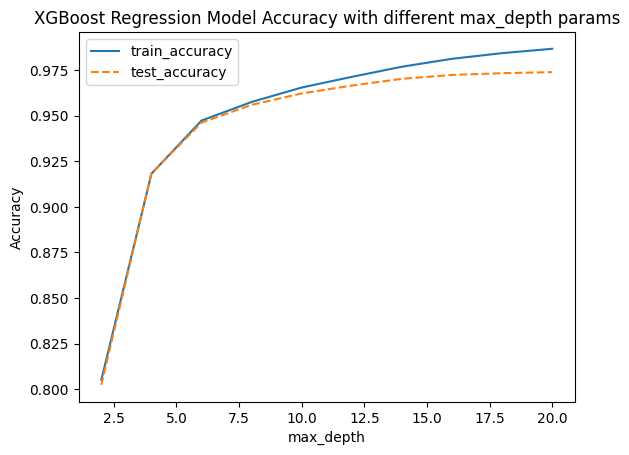

In [ ]:
learning_curve(model_name ='XGBoost Regression', 
                       tune_param_name ='max_depth', 
                       params = depth_list,
                       train_accuracies = xgb_train_accuracies, 
                       test_accuracies = xgb_test_accuracies)

In [ ]:
best_xgb_model = select_best_model(model_type = 'XGBoost Regression',
                  hyperparam = 'max_depth',
                  params = depth_list,
                  model_list = model_list,
                  train_accuracies = xgb_train_accuracies,
                  test_accuracies = xgb_test_accuracies,
                  x_test = x_test_pca, 
                  y_test = y_test)

----- XGBoost Regression Model Selection Summary -----
----- We select the best model by highest training accuracy. ----
Best XGBoost Regression Model has hyperparameter [max_depth] with value [20].
Best XGBoost Regression Model Training Accuracy: [0.9866605645952841].
Best XGBoost Regression Model Testing Accuracy: [0.9738591675073972].
Best XGBoost Regression Model RMSE: [3682.924317182243]
Best XGBoost Regression Model MAE: [1921.2615970781649]


## Neural Network Model

### Split the training data and testing data 
*   80% of the data will be used for training, 20% of the data will be used for testing.
*   Convert data from numpy array to tensors

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, label, test_size=0.2, random_state=42)
#convert to tensors
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train.to_numpy())
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test.to_numpy())
# check the training tensor and testing tensor size 
print("Training Data Tensor Size: features x:{},  label y:{}".format(x_train.shape, y_train.shape))
print("Testing Data Tensor Size: features x:{},  label y:{}".format(x_test.shape, y_test.shape))

Training Data Tensor Size: features x:torch.Size([240171, 19]),  label y:torch.Size([240171, 1])
Testing Data Tensor Size: features x:torch.Size([60043, 19]),  label y:torch.Size([60043, 1])


### NN Model Architecture

In [ ]:
class NN(torch.nn.Module):
    def __init__(self, features, hidden1):
        super(NN, self).__init__()
        self.linear1 = torch.nn.Linear(features, hidden1)  
        self.relu1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(hidden1, hidden1)
        self.relu2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(hidden1, 1)

    def forward(self, x):
        return self.linear3(self.relu2(self.linear2(self.relu1(self.linear1(x)))))

### NN Model Training
*   Optimizer: we pick adaboost and tune the learning rate with gridsearch. We also tune the hidden features with gridsearch
*   Loss: we choose RMSE. 
*   We will train this dataset for 250 epochs because of our large dataset.

<b>Conclusion:</b>
1. By training the neural network model with different learning rate and hidden layers, we find the best nn model.
2. The best neural network model will have learning rate of $0.01$.
3. The neural network model will have hidden layers of $10$.
4. By using this model, Neural Network Model RMSE: $4927.0879$. However, the result would be slightly different every time.

In [ ]:
#train the NN
#tune the learning rate and hidden layer via grid search
num_data, num_features = x_train.shape
criterion = nn.MSELoss()
best_lr = []
best_hidden = []
final_loss = []
best_loss_list = []
models = []
lr_list = [5, 4, 3, 2, 1, 0.5, 0.1, 0.05, 0.01]
hidden_list = [10, 20]

for hidden in hidden_list:
  for lr in lr_list:
    model = NN(num_features, hidden)
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)
    training_loss_list = []
    best_lr.append(lr)
    best_hidden.append(hidden)
    for i in range(250):
        cur_epoch = i; 
        optimizer.zero_grad()
        y_predicted = model(x_train.float())
        loss = torch.sqrt(criterion(y_predicted, y_train.float()))
        #last iteration, append to lists
        if (i == 249):
          print("Final loss from hidden_layers {} and learning rate {}: [{}]".format(hidden, lr, loss))
          models.append(model)
          final_loss.append(loss)
        training_loss_list.append(loss.item()); 
        loss.backward()
        optimizer.step()
    best_loss_list.append(training_loss_list)

Final loss from hidden_layers 10 and learning rate 5: [5279.798828125]
Final loss from hidden_layers 10 and learning rate 4: [4972.01025390625]
Final loss from hidden_layers 10 and learning rate 3: [5333.8466796875]
Final loss from hidden_layers 10 and learning rate 2: [5117.24755859375]
Final loss from hidden_layers 10 and learning rate 1: [5479.7197265625]
Final loss from hidden_layers 10 and learning rate 0.5: [5619.16015625]
Final loss from hidden_layers 10 and learning rate 0.1: [5795.755859375]
Final loss from hidden_layers 10 and learning rate 0.05: [6071.083984375]
Final loss from hidden_layers 10 and learning rate 0.01: [16134.8955078125]
Final loss from hidden_layers 20 and learning rate 5: [30011.30859375]
Final loss from hidden_layers 20 and learning rate 4: [4941.78271484375]
Final loss from hidden_layers 20 and learning rate 3: [4867.71337890625]
Final loss from hidden_layers 20 and learning rate 2: [4795.03955078125]
Final loss from hidden_layers 20 and learning rate 1: 

##### Model Selection and Performance Analysis


In [ ]:
#identify the best model through grid search
min_value = min(final_loss)
#return the index of minimum value 
index = final_loss.index(min_value)
loss = min_value
best_model = models[index]
lr = best_lr[index]
hidden = best_hidden[index]
training_loss_list = best_loss_list[index]
print("Best NN model with hidden layers {}, learning rate {}, and final loss {}.".format(hidden, lr, loss))

Best NN model with hidden layers 20, learning rate 2, and final loss 4795.03955078125.


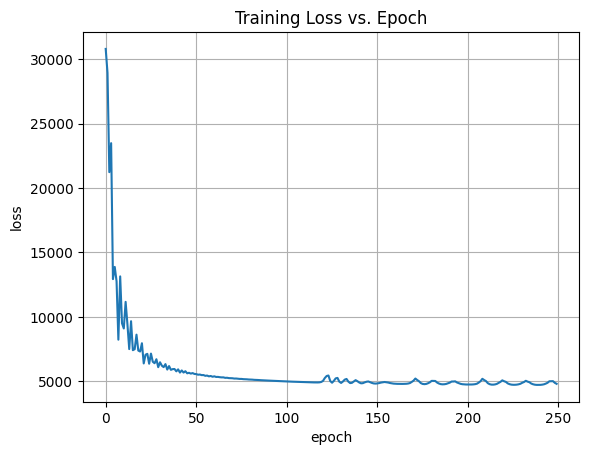

In [ ]:
# training loss vs epoch graph
epoch_list = range(0, 250)
plt.plot(epoch_list, training_loss_list)
plt.title('Training Loss vs. Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.autoscale(enable=True, axis='x', tight=False)
plt.grid()

# Model Performance

*   We have trained Linear, Lasso, Ridge, Elastic Net, XGBoost and Decision Tree Regression models on our dataset and evaluated its performance with various alpha values or max depth to show the difference of trainning and testing accuracy. 

*   After Regularized Linear Regression, the performance of this model is greatly improved. Ridge Regression and Elastic Net Regression models get accuracy around 90%. 

*  Our best neural network model has a RMSE of 4927.0879. However, as we are limited to a small number of epoch size, we cannot see how well it could actually be.

*   The best performance is created by our XGBoost model and it will correspond to train accuracy of 98% and test accuracy of 97%.

# Challenges

* Dataset Selection: There are lots of flight price datasets out there. However, some of them are too large that has 30GB with more than 10M entries, while some of them don’t have the features we want to include for predictions. At the end, we picked a most suitable one with all features we need. Nonetheless, the limitation is that it only includes cities within India.
* Data Training: As the dataset we selected has 300,214 entries, we could not run a large number of epoch which would largely affect the accuracies.
* Modeling Selection: Since the dataset has a categorical feature with 7 categories, and we have more than 30K entries. Therefore, when we pick model like random forest, it would crash because it takes a lot of RAM to do the computation even we use a max depth of 1.
* Time Difference: This is not a project related problem, but it is a challenge for our team to work on the project together because we are not in the same time zone. However, we made it at the end.

# Next Steps

*   Refine the model: Evaluate the performance of the model on the test data and identify areas for improvement. We will further fine tune hyperparameters, or feature engineering techniques to try and improve the accuracy of the model.
*   Collect more data: We will endeavor to conduct research on a larger dataset that encompasses flights from around the world, as opposed to a single country. Ideally, this dataset will cover a longer period of time, potentially spanning multiple years.
*   Upgrade resources: To address resource limitations that have caused our system to crash during previous attempts using models such as Random Forest, we will upgrade our cloud service. With increased resources, we will be able to test additional models.
*   Project deployment: We shall create a user interface that enables users to input their desired flight details and receive a predicted price in response. The model will live on a cloud service, such as AWS or Azure.